# Defining a classification pipeline

In [87]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

## Understanding the data

Dataset information

Add Suggestion
This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api. 

The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .

It contains the following 6 fields:

    target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
    ids: The id of the tweet ( 2087)
    date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
    flag: The query (lyx). If there is no query, then this value is NO_QUERY.
    user: the user that tweeted (robotickilldozr)
    text: the text of the tweet (Lyx is cool)

In [88]:
df_data = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", sep=",", encoding="latin1", names=["label", "id", "datetime", "flag", "user", "text"])

In [89]:
df_data.head()

,label,id,datetime,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [90]:
df_data.shape

(1600000, 6)

In [91]:
df_data["label"].value_counts()

label
0    800000
4    800000
Name: count, dtype: int64

# Data Preprocessing

Removing Unnecessary Fields: We'll drop the id, datetime, flag, and user columns as they don't contribute to the classification task.

In [92]:
# Step 1: Remove unnecessary fields
df_data = df_data[['label', 'text']]

Step 2: Handle missing values by dropping rows with missing 'text' or 'label'

In [93]:
df_data.dropna(subset=['text', 'label'], inplace=True)

Step 3: Text Preprocessing

In [94]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Defining a preprocessing function to apply tokenization, stopword removal, and lemmatization

In [95]:
def preprocess_text(text):
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [96]:
df_data['text'] = df_data['text'].apply(preprocess_text)

In [97]:
df_data.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,upset can't update facebook texting it... migh...
2,0,@kenichan dived many time ball. managed save 5...
3,0,whole body feel itchy like fire
4,0,"@nationwideclass no, behaving all. i'm mad. he..."


Identifing that "@profilenames" and links like http:// or www., will not be good words to define a sentiment

In [98]:
import re
def remove_mentions_and_links(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    return text


In [99]:
df_data['text'] = df_data['text'].apply(remove_mentions_and_links)

In [100]:
df_data.head()

,label,text
0,0,- a that's bummer. shoulda got david carr th...
1,0,upset can't update facebook texting it... migh...
2,0,dived many time ball. managed save 50% rest g...
3,0,whole body feel itchy like fire
4,0,"no, behaving all. i'm mad. here? can't see th..."


Identifing that not all punctuation actually mean sentiment

In [101]:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s!?]', '', text)
    return text

In [102]:
df_data['text'] = df_data['text'].apply(remove_punctuation)

In [103]:
df_data.head()

,label,text
0,0,a thats bummer shoulda got david carr third...
1,0,upset cant update facebook texting it might cr...
2,0,dived many time ball managed save 50 rest go ...
3,0,whole body feel itchy like fire
4,0,no behaving all im mad here? cant see there


# Classification Pipeline



    Naive Bayes with CountVectorizer
    Naive Bayes with TfidfVectorizer
    Logistic Regression with CountVectorizer
    Logistic Regression with TfidfVectorizer



In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Pipeline 1: Naive Bayes with CountVectorizer

In [105]:
# Pipeline 1: Naive Bayes with CountVectorizer
pipeline_nb_cv = Pipeline([
    ('vectorizer', CountVectorizer()),  # Bag of words
    ('classifier', MultinomialNB())  # Naive Bayes classifier
])


Pipeline 2: Naive Bayes with TfidfVectorizer

In [106]:
# Pipeline 2: Naive Bayes with TfidfVectorizer
pipeline_nb_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # TF-IDF
    ('classifier', MultinomialNB())  # Naive Bayes classifier
])

Pipeline 3: Logistic Regression with CountVectorizer

In [107]:
# Pipeline 3: Logistic Regression with CountVectorizer
pipeline_lr_cv = Pipeline([
    ('vectorizer', CountVectorizer()),  # Bag of words
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression
])


Pipeline 4: Logistic Regression with TfidfVectorizer

In [108]:
pipeline_lr_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # TF-IDF
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression
])


In [109]:
pipelines = {
    'Naive Bayes + CountVectorizer': pipeline_nb_cv,
    'Naive Bayes + TfidfVectorizer': pipeline_nb_tfidf,
    'Logistic Regression + CountVectorizer': pipeline_lr_cv,
    'Logistic Regression + TfidfVectorizer': pipeline_lr_tfidf
}

data = {
    'Naive Bayes + CountVectorizer' : {"acc_train": [], "acc_test": []},
    'Naive Bayes + TfidfVectorizer': {"acc_train": [], "acc_test": []},
    'Logistic Regression + CountVectorizer': {"acc_train": [], "acc_test": []},
    'Logistic Regression + TfidfVectorizer': {"acc_train": [], "acc_test": []}
}

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


def generate_learning_curve(df, text_column, label_column, pipeline, data, fractions=np.linspace(0.1, 1.0, 10), repeats=5, test_size=0.2, random_state=42):

    
    for frac in fractions:
        train_acc = []
        test_acc = []
        
        # Resample and shuffle the dataset
        df_sampled = df.sample(frac=frac, random_state=random_state).sample(frac=1)  # Resample and shuffle
        X = df_sampled[text_column]
        y = df_sampled[label_column]
        
        # Repeat multiple times for more stable accuracy
        for _ in range(repeats):
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
            
            # Train the model on the training data
            pipeline.fit(X_train, y_train)
            
            # Get accuracy for training and testing sets
            train_acc.append(accuracy_score(y_train, pipeline.predict(X_train)))
            test_acc.append(accuracy_score(y_test, pipeline.predict(X_test)))
        
        # Store mean accuracies for the current fraction
        data["acc_train"].append(np.mean(train_acc))
        data["acc_test"].append(np.mean(test_acc))

In [111]:
for name, pipeline in pipelines.items():
    print(name)
    generate_learning_curve(df_data, "text", "label", pipeline, data[name])

Naive Bayes + CountVectorizer


KeyboardInterrupt: 

Saving the data generated

In [76]:
import json

# # Save the dictionary to a file
# with open('data.json', 'w') as file:
#     json.dump(data, file, indent=4)

In [146]:
with open('data.json', 'r') as file:
    data = json.load(file)

## Evaluating the datasetsize and the models performance


In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Define the fractions used in the learning curve
fractions = np.linspace(0.1, 1.0, 10)

# Plot the training and testing accuracies for each model
plt.figure(figsize=(15, 10), dpi=1000)

# Naive Bayes + CountVectorizer
plt.plot(fractions, data['Naive Bayes + CountVectorizer']["acc_train"], label='Naive Bayes + CountVectorizer (Train)', color='blue', marker='o', linestyle='-')
plt.plot(fractions, data['Naive Bayes + CountVectorizer']["acc_test"], label='Naive Bayes + CountVectorizer (Test)', color='blue', marker='o', linestyle='--')

# Naive Bayes + TfidfVectorizer
plt.plot(fractions, data['Naive Bayes + TfidfVectorizer']["acc_train"], label='Naive Bayes + TfidfVectorizer (Train)', color='green', marker='o', linestyle='-')
plt.plot(fractions, data['Naive Bayes + TfidfVectorizer']["acc_test"], label='Naive Bayes + TfidfVectorizer (Test)', color='green', marker='o', linestyle='--')

# Logistic Regression + CountVectorizer
plt.plot(fractions, data['Logistic Regression + CountVectorizer']["acc_train"], label='Logistic Regression + CountVectorizer (Train)', color='red', marker='o', linestyle='-')
plt.plot(fractions, data['Logistic Regression + CountVectorizer']["acc_test"], label='Logistic Regression + CountVectorizer (Test)', color='red', marker='o', linestyle='--')

# Logistic Regression + TfidfVectorizer
plt.plot(fractions, data['Logistic Regression + TfidfVectorizer']["acc_train"], label='Logistic Regression + TfidfVectorizer (Train)', color='purple', marker='o', linestyle='-')
plt.plot(fractions, data['Logistic Regression + TfidfVectorizer']["acc_test"], label='Logistic Regression + TfidfVectorizer (Test)', color='purple', marker='o', linestyle='--')

# Customize the plot
plt.xlabel('Fraction of Dataset')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Dataset Fraction for Different Models')
plt.legend()
plt.grid(True)

plt.xticks(fractions)  # Set x-axis ticks to match the fractions
plt.yticks(np.arange(0.7, 0.9, 0.02))  # Set y-axis ticks from 0.5 to 1.0 with a step of 0.05


# Show the plot
plt.show()


## Evaluating the model that had best performance


In [133]:
# Select the pipeline for Logistic Regression + TfidfVectorizer
model = pipelines["Logistic Regression + TfidfVectorizer"]

# Define the features and labels
X = df_data["text"]
y = df_data["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


### Confusion Matrix

<Figure size 800x600 with 0 Axes>

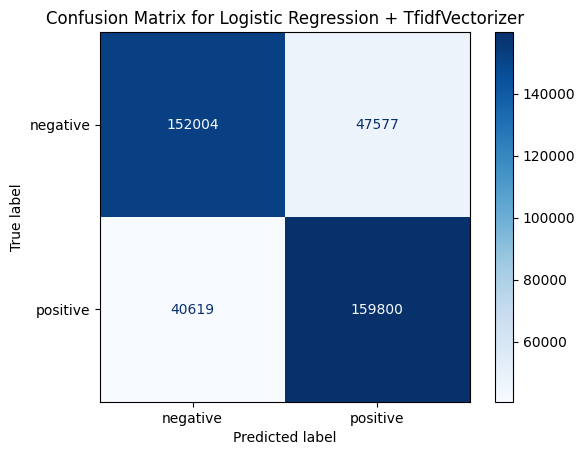

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model['classifier'].classes_)

# Manually specify the display labels
display_labels = ['negative', 'positive']

# Create the confusion matrix display with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression + TfidfVectorizer")
plt.show()


In [144]:
47577/ (152204 + 47577)

0.23814576961773143

In [145]:
40619/ (159800 + 40619)

0.2026704055004765

## Five words with most negative relevance

In [140]:
words = model['vectorizer'].get_feature_names_out()
coefs = model['classifier'].coef_
classes = model['classifier'].classes_

sorted_coef_indexes = coefs.argsort(axis=1)
print(classes[0])
top5words = words[sorted_coef_indexes[0,:5]]
print(top5words)
top5coefs = coefs[0,sorted_coef_indexes[0,:5]]
print(top5coefs)

0
['sad' 'miss' 'unfortunately' 'sadly' 'died']
[-12.3558297   -7.89985308  -7.84254794  -7.69242695  -7.02201295]


## Five words with most positive relevance

In [142]:
words = model['vectorizer'].get_feature_names_out()
coefs = model['classifier'].coef_
classes = model['classifier'].classes_

sorted_coef_indexes = coefs.argsort(axis=1)
print(classes[1])
top5words = words[sorted_coef_indexes[0,-5:][::-1]]
print(top5words)
top5coefs = coefs[0,sorted_coef_indexes[0,-5:][::-1]]
print(top5coefs)

4
['smile' 'thanks' 'thank' 'proud' 'welcome']
[5.56094557 5.19137854 5.03526961 4.81046797 4.75252119]


## Topic Analysis

In [150]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Topic Modeling with Latent Dirichlet Allocation (LDA)
n_topics = 5  # You can adjust the number of topics based on your dataset

# Vectorize the text for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts = count_vectorizer.fit_transform(df_data['text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
topic_matrix = lda.fit_transform(X_counts)

# Assign a topic to each document
df_data['topic'] = topic_matrix.argmax(axis=1)

# Split data into training and testing based on topics
X_train, X_test, y_train, y_test = train_test_split(df_data[['text', 'topic']], df_data['label'], random_state=42)

# Train classifiers for each topic
classifiers = {}
for topic in range(n_topics):
    # Filter the data by topic
    X_train_topic = X_train[X_train['topic'] == topic]['text']
    y_train_topic = y_train[X_train['topic'] == topic]
    
    if len(X_train_topic) > 0:
        # Use the same pipeline (Logistic Regression + TfidfVectorizer)
        pipeline = pipelines["Logistic Regression + TfidfVectorizer"]
        pipeline.fit(X_train_topic, y_train_topic)
        classifiers[topic] = pipeline

# Two-layer classification
def two_layer_classifier(text, topic_model, classifiers):
    # Vectorize the text for topic model
    text_counts = count_vectorizer.transform([text])
    topic_prob = topic_model.transform(text_counts)
    predicted_topic = topic_prob.argmax()

    # Classify based on the predicted topic
    if predicted_topic in classifiers:
        return classifiers[predicted_topic].predict([text])[0]
    else:
        # Fallback to default classifier if no specific topic classifier exists
        return model.predict([text])[0]

# Predict on the test set using the two-layer classifier
y_pred_topic = [two_layer_classifier(text, lda, classifiers) for text in X_test['text']]

# Evaluate the two-layer classifier performance
print("Two-Layer Classifier Accuracy:", accuracy_score(y_test, y_pred_topic))
print(classification_report(y_test, y_pred_topic))

# Topic Analysis: Checking error rates for each topic
for topic in range(n_topics):
    # Filter test set by topic
    X_test_topic = X_test[X_test['topic'] == topic]['text']
    y_test_topic = y_test[X_test['topic'] == topic]

    if len(X_test_topic) > 0:
        y_pred_topic = classifiers[topic].predict(X_test_topic)
        accuracy = accuracy_score(y_test_topic, y_pred_topic)
        print(f"Topic {topic} Accuracy: {accuracy}")


Two-Layer Classifier Accuracy: 0.751365
              precision    recall  f1-score   support

           0       0.80      0.67      0.73    199581
           4       0.72      0.83      0.77    200419

    accuracy                           0.75    400000
   macro avg       0.76      0.75      0.75    400000
weighted avg       0.76      0.75      0.75    400000

Topic 0 Accuracy: 0.7282132041187159
Topic 1 Accuracy: 0.7592813742601803
Topic 2 Accuracy: 0.7390460583060203
Topic 3 Accuracy: 0.7408380869305726
Topic 4 Accuracy: 0.7878142813216964
